In [1]:
import reviewer

print('bibtex\t', [k for k, v in reviewer.list_bib()])
print('form\t', [k for k, v in reviewer.list_form()])
print('project\t', [k for k, v in reviewer.list_project()])

bibtex	 ['Context_dz', 'Abstract_animal', 'Hybrid modelling']
form	 ['hybrid']
project	 ['Hy', 'HybridModelling']


path = 'data/Context_dz.bib'


abbreviations = ['HIV', 'STD', 'NCD', 'SD', 'DES', 'ABM', 'EBM', 'BMC', 'I', 'II', 'OR', 
                 'IEEE', 'PLOS', 'WSC', 'JAIDS', 'RIVF', '(RIVF)', '(WSC)']

pl = reviewer.paper_list_from_source('data/Context_dz.bib', 'data_form/hybrid.json', abbreviations)




In [2]:
reviewer.login_reviewer('Me')

reviewer.load_project('HybridModelling')

reviewer.attach_project('Me','HybridModelling')

reader = reviewer.Reviewers['Me']
reader.select_all('Context In', [])
ps = reader.get_selected_papers()
pl = reviewer.PaperLists['HybridModelling']

In [4]:
import pandas as pd
import wtforms.fields as fld
from collections import OrderedDict

tables = OrderedDict()
fs = pl.Forms.Fields

for k, v in fs.items():
    if v.field_class is fld.SelectField:
        cho = dict(v.kwargs['choices'])
        dat = pd.Series([cho[int(p[k])] for p in ps])
        cnt = pd.value_counts(dat)
        
    elif v.field_class is fld.BooleanField:
        dat = pd.Series(['Yes' if k in p.Attributes and p[k] == 'y' else 'No' for p in ps])
        cnt = pd.value_counts(dat)
    else:
        continue
        
        
    tab = pd.DataFrame()
    tab['N'] = cnt
    tab['%'] = round(cnt/cnt.sum() * 100)
    print(v.args[0])
    print(tab)
    print()
        

What was the type of the study?
                                  N     %
Applying hybrid modelling         7  58.0
Deriving hybrid modelling theory  2  17.0
Discussion of hybrid modelling    2  17.0
Exemplifying of hybrid modelling  1   8.0

Was there a clear implementation detail of the model?
     N     %
Yes  9  75.0
No   3  25.0

Was there at least one simulation experiment of the model?
     N     %
Yes  8  67.0
No   4  33.0

What did the term describe the ABM?
                           N     %
Agent-Based Model          9  75.0
Individual-Based Model     2  17.0
Discrete-Event Simulation  1   8.0

Was the ABM stochastic?
      N     %
Yes  10  83.0
No    2  17.0

Was the ABM populated with empirical data?
      N     %
No   11  92.0
Yes   1   8.0

Was the parameters of the ABM from empirical data?
      N     %
No   10  83.0
Yes   2  17.0

Was the ABM calibrated by empirical observation?
      N     %
No   10  83.0
Yes   2  17.0

What did the term describe the EBM?
            

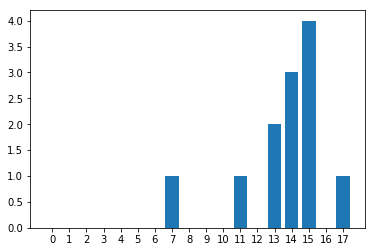

In [5]:
import matplotlib.pyplot as plt
from collections import Counter

arr = range(2000, 2018)
years = Counter([p.Year for p in ps])
years = [years[yr] for yr in arr]

plt.bar(arr, years)
plt.xticks(arr, range(0, 18))

plt.show()

In [11]:
x.select('Abstract In', [])
x.Selected

['Chick2000',
 'DAgata2007',
 'Djanatliev2012',
 'Fallah-Fini2013',
 'Ferguson2000',
 'Gosce2014',
 'Kamp2010',
 'Kasereka2014']

In [12]:
x.select_all()
x.Selected

['Alam2013',
 'Banos2015',
 'Bobashev2007',
 'Caudill2013',
 'Chen2000',
 'Chick2000',
 'DAgata2007',
 'Djanatliev2012',
 'Fallah-Fini2013',
 'Ferguson2000',
 'Gosce2014',
 'Kamp2010',
 'Kasereka2014',
 'Laperriere2016',
 'Leamy2009',
 'Lee2015',
 'Lukens2014',
 'Manore2015',
 'McCaig2008',
 'Morgan2016',
 'Otero2011',
 'Stevens2018',
 'Tejada2014',
 'Tejada2015',
 'Le-Kim2016',
 'Viana2014',
 'Vincenot2011',
 'Wasik2014']